# Part 1:  Simple linear regression for one independent variable

In this lab, you will load data, plot data, perform simple mathematical manipulations, and fit a simple linear regression model.  Before doing this lab, you can go through the class demo on simple linear regression for an automobile dataset.  The lab use the Ames Housing dataset which is a commonly used machine learning data set for illustrating basic concepts.  

## Loading the data

The Ames housing data set was collected in 2011 and contains information about home sales in Ames, Iowa, including the sale price and numerical and categorical information about each home. We have constructed a "reduced" version of the dataset that is available at:

https://www.chrismusco.com/machinelearning2024_grad/AmesHousing.csv.

More information about the meaning of each column can be found here: https://cran.r-project.org/web/packages/AmesHousing/AmesHousing.pdf. Note that our version of the dataset contains a subset of the columns in the original dataset and the last column, SalesPrice, is in units of 1000s of US dollars in our version.

In the lab, you will complete all the code marked `TODO`.

First, complete the following code that uses the `pd.read_csv` command to read the data from the file linked above.

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("AmesHousing.csv")

Display the first six rows of the data frame

In [3]:
df.head(6)

,Lot Area,Year Built,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,SalePrice
0,31770,1960,441.0,1080.0,1656,0,1656,1,0,3,7,2,2.0,528.0,215.0
1,11622,1961,270.0,882.0,896,0,896,1,0,2,5,0,1.0,730.0,105.0
2,14267,1958,406.0,1329.0,1329,0,1329,1,1,3,6,0,1.0,312.0,172.0
3,11160,1968,1045.0,2110.0,2110,0,2110,2,1,3,8,2,2.0,522.0,244.0
4,13830,1997,137.0,928.0,928,701,1629,2,1,3,6,1,2.0,482.0,189.9
5,9978,1998,324.0,926.0,926,678,1604,2,1,3,7,1,2.0,470.0,195.5


## Basic Manipulations on the Data

What is the shape of the data?  How many attributes are there?  How many samples?
Print a statement of the form:

    num samples=xxx, num attributes=yy

In [4]:
num_samples, num_attributes = df.shape
print(num_samples, num_attributes)

2930 15


The dataset contains some NaN value. Before proceeding, drop all rows from the dataframe with NaN values. There should only be a few.

In [5]:
df = df.dropna()
df.shape

(2928, 15)

Create a response vector `y` with the values in the column `SalePrice`.  The vector `y` should be a 1D `numpy.ndarray` structure.

In [18]:
y = df["SalePrice"].values
y.shape

(2928,)

Use the response vector `y` to find the mean house price in thousands and the fraction of homes that are above $120k. Print and label your results.

In [19]:
ymean = np.mean(y)
print("mean of y is:" , ymean)
fraction = sum(y > 120)/y.shape[0]
print('required percent of houses greater than $120k:', str(fraction*100))

mean of y is: 180.84103381147543
required percent of houses greater than $120k: 81.69398907103826


## Visualizing the Data

Load the `matplotlib` package with the following commands.

In [74]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Similar to the `y` vector, create a predictor vector `x` containing the values in the `TotRms AbvGrd` column, which represents the total number of non-basement rooms in the home.

In [22]:
x = df["TotRms AbvGrd"].values
print(x.shape)

(2928,)


Create a scatter plot of the price vs. the `TotRms AbvGrd` attribute.  Label the axes with reasonable labels so that someone else can understand the plot.

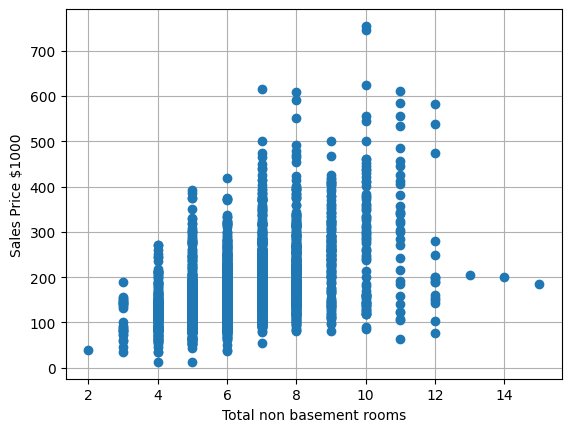

In [29]:
# TODO
plt.plot(x, y, 'o')
plt.xlabel("Total non basement rooms")
plt.ylabel("Sales Price $1000")
plt.grid(True)

## Fitting a Simple Linear Model

We will write a simple function to perform a linear fit under the squared loss function. Use the formulae given in the class to compute the optimal parameters $\beta_0,\beta_1$ in the linear model $$y =\beta_0 + \beta_1 x$$ as well as the optimal loss $\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x)^2$.

In [24]:
def fit_linear(x,y):
   """
   Given vectors of data points (x,y), performs a fit for the linear model:
      y = beta0 + beta1*x,
   The function returns beta0, beta1, and loss, where loss is the sum-of-squares loss of.
   """

   xmean = np.mean(x)
   ymean = np.mean(y)
   sxx = np.mean((x - xmean)**2)
   syy = np.mean((y - ymean)**2)
   sxy = np.mean((x - xmean)*(y - ymean))

   beta1 = sxy/sxx
   beta0 = ymean - (beta1 * xmean)

   ypred = beta0 + (beta1 * x)

   loss = np.sum((ypred - y)**2)
   
   return beta0, beta1, loss

Using the function `fit_linear` above, print the values `beta0`, `beta1` and `loss` for the linear model of price vs. number of rooms.

In [26]:
beta0, beta1, loss = fit_linear(x, y)
print("Beta0:", beta0)
print("Beta1:", beta1)
print("Squared Loss:", loss)

Beta0: 18.78067695087961
Beta1: 25.149073822759412
Squared Loss: 14101634.9287433


Replot the scatter plot above, but now with the regression line.  You can create the regression line by creating points `yp` that are the predicted values for each value in `x`, according to our linear model. Plot as a line, not a scatter plot.

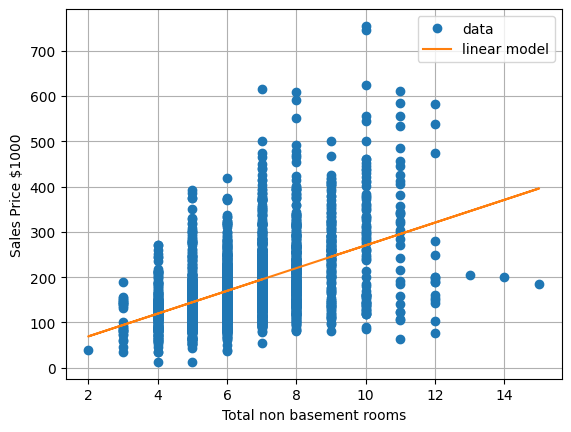

In [31]:
plt.plot(x, y, 'o')
plt.plot(x, beta0 + beta1*x, '-')
plt.xlabel("Total non basement rooms")
plt.ylabel("Sales Price $1000")
plt.legend(['data', 'linear model'])
plt.grid(True)

# Part 2:  Compare different dependent variables


We next compute the squared loss for all the predictors and output the values in a table. Your table should look like the following, where each entry in the first column is the attribute name and the second column is the squared loss.

    Lot Area           XXXXX
    Overall Qual       XXXXX
    Overall Cond       XXXXX
    ...         ...

You will need to write a loop to perform this task.

What variable does the best job predicting house price?

In [50]:
data_loss = []
attributes = df.columns[:-1].values

# print(attributes)

min_loss = np.inf
min_loss_attribute = None

for attribute in attributes:
    data = df[attribute].values
    beta0, beta1, loss = fit_linear(data, y)
    if loss < min_loss:
        min_loss = loss
        min_loss_attribute = attribute
    data_loss.append([attribute, format(loss, 'f')])

loss_df = pd.DataFrame(data_loss, index=None, columns=['Attributes', 'Linear Fit Squared Loss']) 
print(loss_df)

print("\nThe attribute with the lowest Loss is:", min_loss_attribute, "and the loss is:", str(min_loss))



       Attributes Linear Fit Squared Loss
0        Lot Area         17355552.128975
1      Year Built         12857597.521090
2     Bsmt Unf SF         18057043.352683
3   Total Bsmt SF         11213377.809485
4      1st Flr SF         11463538.458358
5      2nd Flr SF         17325635.371666
6     Gr Liv Area          9349292.713520
7       Full Bath         13120702.490638
8       Half Bath         17166315.154120
9   Bedroom AbvGr         18296281.042272
10  TotRms AbvGrd         14101634.928743
11     Fireplaces         14478395.125792
12    Garage Cars         10843473.269896
13    Garage Area         11022825.044525

The attribute with the lowest Loss is: Gr Liv Area and the loss is: 9349292.71352037


**TODO:** Describe in words the meaning of the most predictive variable for housing price.

# Part 3:  Compare different loss functions

## A Brute force algorithm for squared loss

Your code in `fit_linear` relies on the closed form expressions for the optimal $\beta_0$ and $\beta_1$, which we derived in class. However, if you did not know these formulas, you could have approximately minimized the loss function by brute force searching over a grid of possible values for $\beta_0$ and $\beta_1$.

For example, we could try out all combinations of parameters where $\beta_0$ is in `np.arange(-50,50,.1)` and $\beta_1$ is in `np.arange(-1,1,.005)`

Write a function which takes this approach to find a $\beta_0$ and $\beta_1$ which approximately minimize the squared loss: $\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x)^2$

In [144]:
def fit_approx(x,y):
   """
   Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
      y = beta0 + beta1*x,
   under the sum-of-squares loss. The min_loss returned is the lost of the best beta0 and beta1 you found.
   """
   min_loss = np.inf

   beta0 = 0
   beta1 = 0

   limit = max(abs(np.min(x)), abs(np.max(x)))

   for b0 in  np.arange(-limit, limit, np.max(x)/500):
      for b1 in np.arange(-1, 1, 0.005):
         loss = np.sum((y - (b0 + b1*x))**2)
         if loss < min_loss:
            beta0 = b0
            beta1 = b1
            min_loss = loss

   return beta0, beta1, min_loss

Compare the output of `fit_approx` and `fit_linear` with `y` being `SalePrice` and `x` being the `Gr Liv Area` variable from our dataset. You should do so:
* quantitatively, by printing the loss that each approach achieves
* and visually, by plotting the different fit lines obtained.

In [145]:
x = df['Gr Liv Area'].values
beta0_app, beta1_app, loss = fit_approx(x, y)
print("Beta0 Approx:", beta0_app)
print("Beta1 Approx:", beta1_app)
print("Approx fit Squared Loss", loss)

Beta0 Approx: 11.283999999825028
Beta1 Approx: 0.11500000000000099
Approx fit Squared Loss 9382395.10491704


In [146]:
beta0, beta1, loss = fit_linear(x,y)
print("Beta0 Linear:", beta0)
print("Beta1 Linear:", beta1)
print("Linear fit Squared Loss", loss)

Beta0 Linear: 13.321908483817452
Beta1 Linear: 0.11169546420703488
Linear fit Squared Loss 9349292.71352037


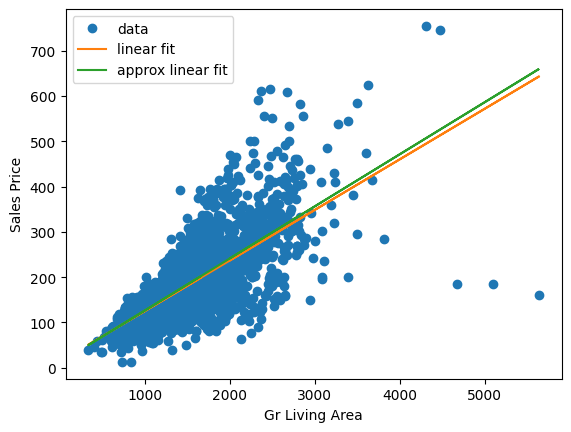

In [147]:
plt.plot(x, y, 'o')
plt.xlabel('Gr Living Area')
plt.ylabel('Sales Price')
plt.plot(x, beta0 + beta1*x, '-')
plt.plot(x, beta0_app + beta1_app*x, '-')
plt.legend(['data', 'linear fit', 'approx linear fit'])

## Extending to different loss functions

One benefit of the above approach is that is easily extends to different loss funtions. Write functions which find an approximately optimal $\beta_0$ and $\beta_1$ for
* minimizing the $\ell_1$ (least absolute deviations) loss: $\sum_{i=1}^n |y_i - \beta_0 - \beta_1 x|$
* minimizing the $\ell_\infty$ (max) loss: $\max_i |y_i - \beta_0 - \beta_1 x|$


In [129]:
def fit_approx_l1(x,y):
   """
   Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
      y = beta0 + beta1*x,
   under the least absolute deviations loss.
   """

   min_loss = np.inf

   beta0 = 0
   beta1 = 0

   limit = max(abs(np.min(x)), abs(np.max(x)))

   for b0 in  np.arange(-limit, limit, np.max(x)/500):
      for b1 in np.arange(-1, 1, 0.005):
         loss = np.sum(np.abs(y - (b0 + b1*x)))
         if loss < min_loss:
            beta0 = b0
            beta1 = b1
            min_loss = loss

   return beta0, beta1, min_loss

In [130]:
def fit_approx_max(x,y):
   """
   Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
      y = beta0 + beta1*x,
   under the max loss.
   """
   min_loss = np.inf

   beta0 = 0
   beta1 = 0

   limit = max(abs(np.min(x)), abs(np.max(x)))

   for b0 in  np.arange(-limit, limit, np.max(x)/500):
      for b1 in np.arange(-1, 1, 0.005):
         loss = np.max(np.abs(y - (b0 + b1*x)))
         if loss < min_loss:
            beta0 = b0
            beta1 = b1
            min_loss = loss

   return beta0, beta1, min_loss

**TODO:** Use your algorithm to obtain 3 different linear fits for `SalePrice` with predictor variable `Gr Liv Area`, one for squared loss, one for $\ell_1$ loss, and one for $\ell_\infty$ loss. Plot the linear fits (along with the data scatter plot) on a single figure and use a legend to indicate which fit corresponds to which loss.

In [131]:
x = df['Gr Liv Area'].values

beta0ApproxL2, beta1ApproxL2, lossL2 = fit_approx(x, y)
beta0ApproxL1, beta1ApproxL1, lossL1 = fit_approx_l1(x, y)
beta0ApproxLINFY, beta1ApproxLINFY, lossLINFY = fit_approx_max(x, y)

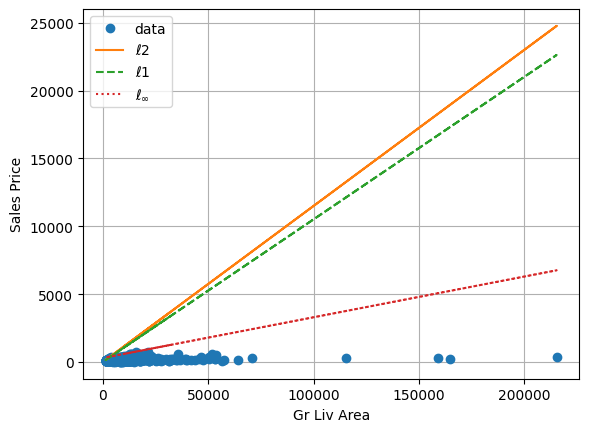

In [110]:
plt.plot(x, y, 'o')
plt.xlabel('Gr Liv Area')
plt.ylabel('Sales Price')
plt.grid(True)

plt.plot(x, beta0ApproxL2 + beta1ApproxL2*x, '-')
plt.plot(x, beta0ApproxL1 + beta1ApproxL1*x, '--')
plt.plot(x, beta0ApproxLINFY + beta1ApproxLINFY*x, ':')

plt.legend(['data', '$\ell$2', '$\ell$1', '$\ell_\infty$'])

**TODO:** Repeat the process above for the `Lot Area` predictor variable, which has some more extreme outliers. Note that  this variable has a different scale than `Gr Liv Area` so you might need to adjust your approximate fit functions accordingly.

Again produce a plot that contains three different linear fits for all three different loss functions. Write 1-2 sentences of discussion about how the choice of loss function effected the fit.

In [152]:
x = df["Lot Area"].values
print(x.shape)

(2928,)


In [153]:
xmean = np.mean(x)
xstd = np.std(x)
print(xmean, xstd)

10149.730532786885 7880.953765431285


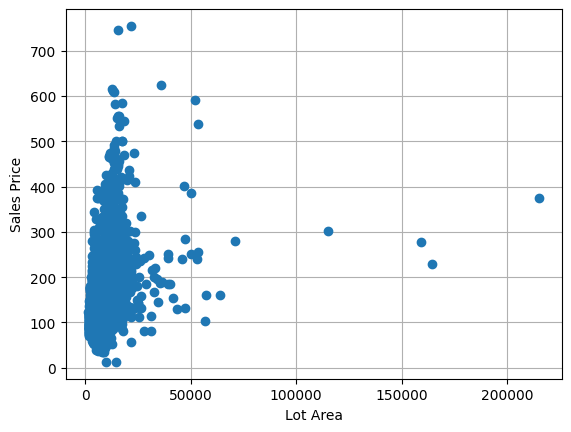

In [154]:
# Scatter Plot

plt.plot(x, y, 'o')
plt.xlabel("Lot Area")
plt.ylabel('Sales Price')
plt.grid(True)

In [155]:
# L2 loss

beta0, beta1, loss = fit_linear(x, y)
print("Beta0 Linear:", beta0)
print("Beta1 Linear:", beta1)
print("Linear fit Squared Loss", loss)

Beta0 Linear: 153.43686369143722
Beta1 Linear: 0.0026999899190933126
Linear fit Squared Loss 17355552.1289748


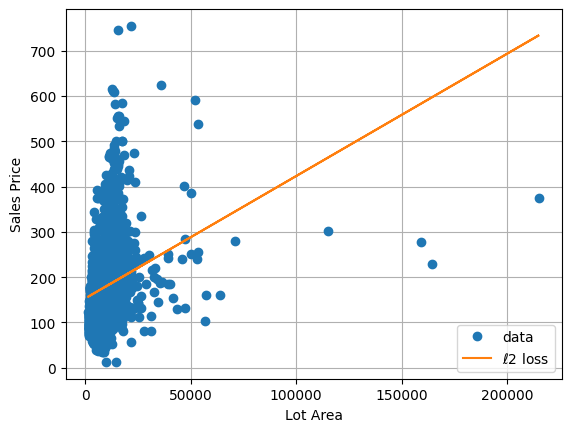

In [156]:
plt.plot(x,y,'o')
plt.plot(x,beta0 + x*beta1,'-')
plt.xlabel('Lot Area')
plt.ylabel('Sales Price')
plt.grid(True)
plt.legend(['data', '$\ell$2 loss'])

In [157]:
# Calculating for all other approx fits

beta0approx_l2, beta1approx_l2, loss_l2 = fit_approx(x,y)
beta0approx_l1, beta1approx_l1, loss_l1 = fit_approx_l1(x,y)
beta0approx_linfy, beta1approx_linfy, loss_linfy = fit_approx_max(x,y)

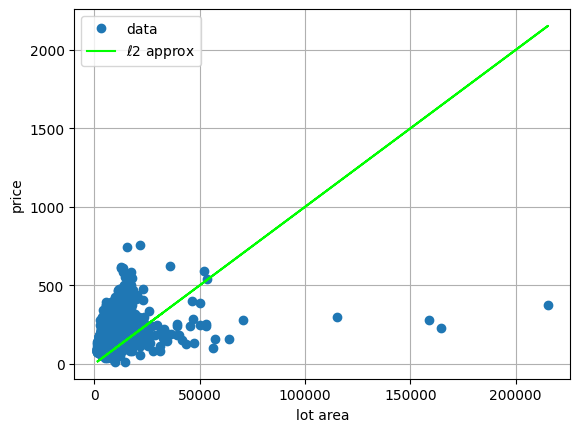

In [158]:
# Scatter Plot with approx linear fit model with l2 loss

plt.plot(x,y,'o')
plt.xlabel('lot area')
plt.ylabel('price')
plt.grid(True)

plt.plot(x,beta1approx_l2 * x + beta0approx_l2, color='#00FF00')
plt.legend(['data' , '$\ell$2 approx'])

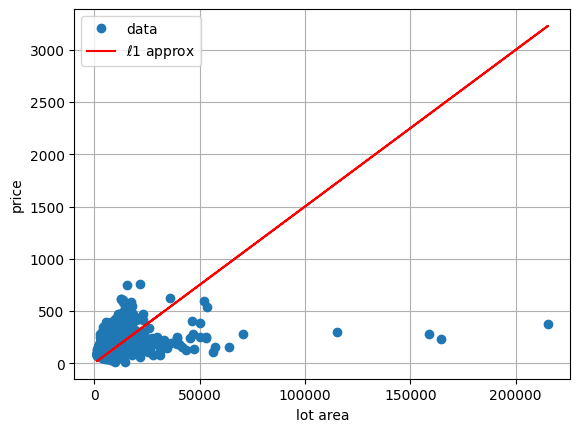

In [159]:
# Scatter Plot with approx linear fit model with l1 loss

plt.plot(x,y,'o')
plt.xlabel('lot area')
plt.ylabel('price')
plt.grid(True)

plt.plot(x,beta1approx_l1 * x + beta0approx_l1, color='#FF0000')
plt.legend(['data' ,'$\ell$1 approx'])

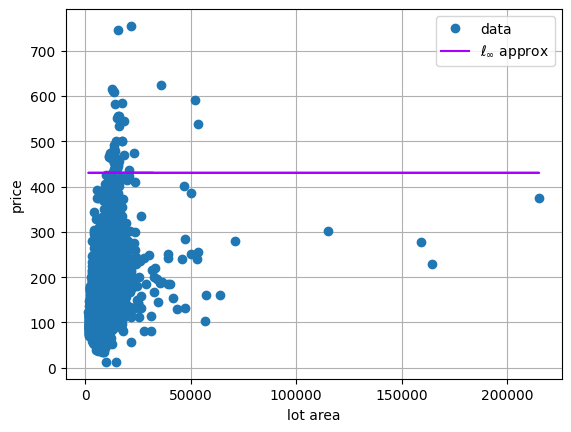

In [160]:
# Scatter Plot with approx linear fit model with lmax loss

plt.plot(x,y,'o')
plt.xlabel('lot area')
plt.ylabel('price')
plt.grid(True)

plt.plot(x,beta1approx_linfy * x + beta0approx_linfy, color='#AA00FF')
plt.legend(['data', '$\ell_\infty$ approx'])

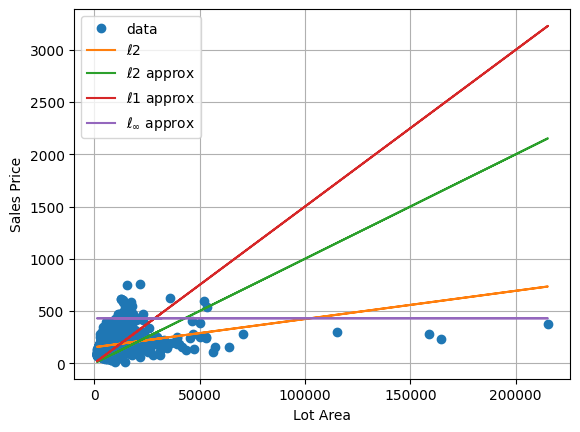

In [162]:
plt.plot(x,y,'o')
plt.xlabel('Lot Area')
plt.ylabel('Sales Price')
plt.grid(True)

plt.plot(x,beta1 * x + beta0)
plt.plot(x,beta1approx_l2 * x + beta0approx_l2)
plt.plot(x,beta1approx_l1 * x + beta0approx_l1)
plt.plot(x,beta1approx_linfy * x + beta0approx_linfy)
plt.legend(['data','$\ell$2' ,'$\ell$2 approx','$\ell$1 approx','$\ell_\infty$ approx'])